Importing Libraries :

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Data Collection and Analysis :

In [98]:
data = pd.read_csv("car_evaluation.csv")

In [99]:
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


As there is no column name we're Giving the column name

In [100]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [101]:
data.columns = col_names

In [102]:
#printing first 5 rows of dataset
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [103]:
#printing last 5 rows of dataset

data.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [104]:
#Getting info about datset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [105]:
#no of rows and columns 

data.shape

(1727, 7)

In [106]:
#Checking for missing valuesn

data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [107]:
#Cheching the distribution of categorical columns

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(data[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


Separate Features and Target :

In [108]:
X = data.drop(columns = 'class', axis = 1 )
Y = data['class']

Splitting the data into Training data & Testing data :

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [110]:
print(X.shape, X_train.shape, X_test.shape)

(1727, 6) (1381, 6) (346, 6)


Label Encoding :

In [111]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [112]:
label_encoder = LabelEncoder()

for column in X.columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.fit_transform(X_test[column])


In [113]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
739,0,2,3,1,2,0
1304,1,3,0,1,2,1
1489,1,0,3,0,1,0
468,0,3,1,1,2,2
265,3,2,1,2,1,0


In [114]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1190,2,1,0,0,1,1
503,0,3,2,2,2,1
1204,2,1,0,1,0,0
123,3,0,0,1,0,2
526,0,3,3,1,1,0


Training the Model :

Decision Tree Classifier 

(i) Decision Tree with criterion Gini index :

In [115]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)

In [116]:
clf_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [117]:
pred_gini_test = clf_gini.predict(X_test)

Evaluation Metrices :

In [118]:
#accuracy Score 0n testing data

acc_score = accuracy_score(Y_test, pred_gini_test)
print("Accuracy Score of Gini is :", acc_score)

Accuracy Score of Gini is : 0.7543352601156069


In [119]:
pred_gini_train = clf_gini.predict(X_train)

In [120]:
#accuracy Score 0n training data

acc_score = accuracy_score(Y_train, pred_gini_train)
print("Accuracy Score of Gini is :", acc_score)

Accuracy Score of Gini is : 0.7863866763215062


Visualizing Decision Tree :

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.454\nsamples = 1381\nvalue = [307, 54, 970, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 448\nvalue = [0, 0, 448, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.572\nsamples = 933\nvalue = [307, 54, 522, 50]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.634\nsamples = 299\nvalue = [159, 24, 66, 50]'),
 Text(0.125, 0.125, 'gini = 0.608\nsamples = 223\nvalue = [126, 24, 23, 50]'),
 Text(0.375, 0.125, 'gini = 0.491\nsamples = 76\nvalue = [33, 0, 43, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.426\nsamples = 634\nvalue = [148, 30, 456, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 321\nvalue = [0, 0, 321, 0]'),
 Text(0.875, 0.125, 'gini = 0.581\nsamples = 313\nvalue = [148, 30, 135, 0]')]

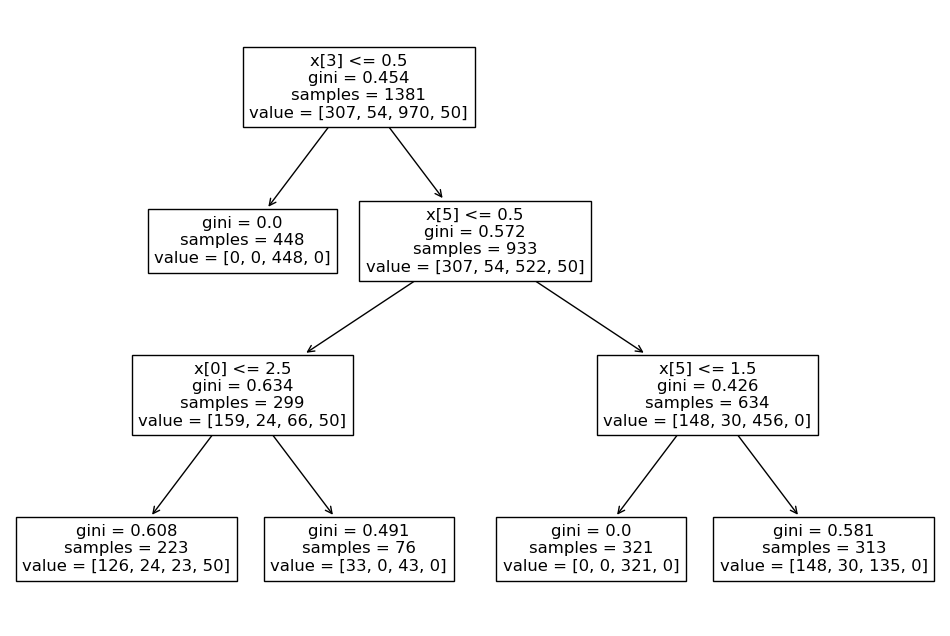

In [121]:
plt.figure(figsize = (12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train))

(ii) Decision Tree with criterion entropy 

In [122]:
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

In [123]:
clf_en.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [124]:
pred_en_test = clf_en.predict(X_test)

Eavluation Metrices :

In [125]:
#accuracy Score 0n testing data

acc_score = accuracy_score(Y_test, pred_en_test)
print("Accuracy Score of Entropy is :", acc_score)

Accuracy Score of Entropy is : 0.7543352601156069


In [126]:
pred_en_train = clf_en.predict(X_train)

In [127]:
#accuracy Score 0n training data

acc_score = accuracy_score(Y_train, pred_en_train)
print("Accuracy Score of Gini is :", acc_score)

Accuracy Score of Gini is : 0.7863866763215062


Visualizing Decision Tree 

[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.196\nsamples = 1381\nvalue = [307, 54, 970, 50]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 448\nvalue = [0, 0, 448, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.461\nsamples = 933\nvalue = [307, 54, 522, 50]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\nentropy = 1.689\nsamples = 299\nvalue = [159, 24, 66, 50]'),
 Text(0.125, 0.125, 'entropy = 1.633\nsamples = 223\nvalue = [126, 24, 23, 50]'),
 Text(0.375, 0.125, 'entropy = 0.987\nsamples = 76\nvalue = [33, 0, 43, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.04\nsamples = 634\nvalue = [148, 30, 456, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 321\nvalue = [0, 0, 321, 0]'),
 Text(0.875, 0.125, 'entropy = 1.358\nsamples = 313\nvalue = [148, 30, 135, 0]')]

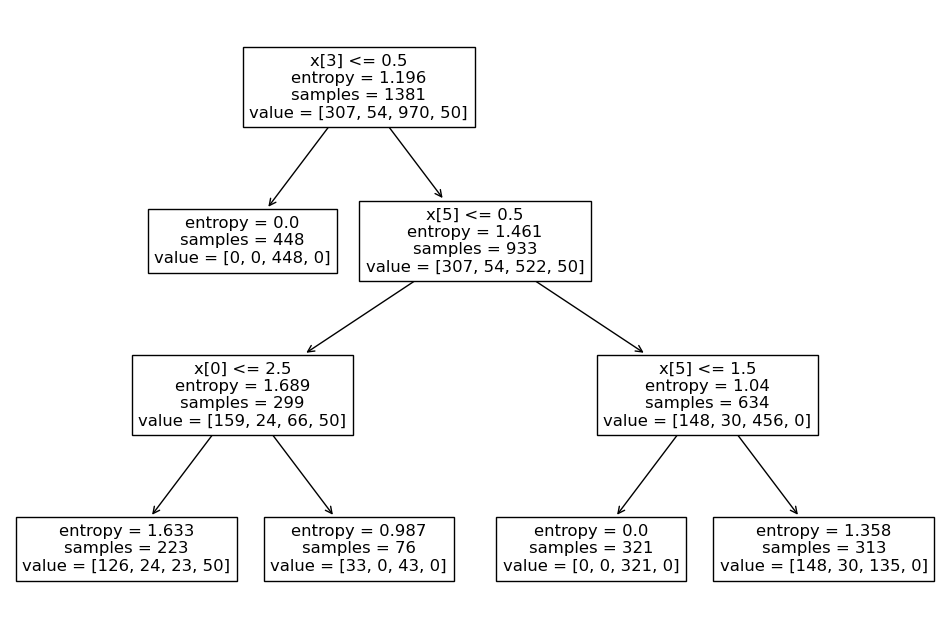

In [128]:
plt.figure(figsize = (12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train))